<a href="https://colab.research.google.com/github/HansAlbertLianto/ieee-fraud-detection/blob/master/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [0]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import preprocessing for label encoding purposes
from sklearn import preprocessing

In [0]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

features_to_take = ['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3',
                    'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
                    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D2',
                    'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
                    'V3', 'V5', 'V7', 'V11', 'V13', 'V14', 'V16', 'V20', 'V24', 'V26', 'V28', 'V30', 'V35', 'V36',
                    'V38', 'V40', 'V41', 'V45', 'V47', 'V49', 'V54', 'V55', 'V56', 'V58', 'V62', 'V65', 'V67', 'V68',
                    'V70', 'V76', 'V78', 'V80', 'V83', 'V87', 'V88', 'V89', 'V91', 'V107', 'V110', 'V112', 'V119',
                    'V121', 'V122', 'V125', 'V131', 'V138', 'V140', 'V142', 'V145', 'V147', 'V162', 'V169', 'V173', 
                    'V174', 'V185', 'V195', 'V210', 'V216', 'V220', 'V222', 'V241', 'V251', 'V271', 'V280', 'V281',
                    'V283', 'V284', 'V286', 'V287', 'V289', 'V291', 'V301', 'V303', 'V305', 'V311', 'V314', 'V323',
                    'V325', 'V335']

features_to_take_id = ['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10',
                       'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
                       'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37',
                       'id_38', 'DeviceType', 'DeviceInfo']

# ID attributes in 
features_to_take_id_test = [feature.replace('_', '-') for feature in features_to_take_id]

# Mention features encoded to a particular dtype
string_features_train = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M4', 'id_12', 'id_15',
                         'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'DeviceType', 'DeviceInfo']

string_features_test = [feature.replace('_', '-') for feature in string_features_train]

boolean_features = ['M' + str(i) for i in range(1, 10) if i != 4] + ['id_' + str(i) for i in range(35, 39)]

In [0]:
# Uploading the train and test datasets
train_df = pd.read_csv('../dataset/train_transaction.csv', usecols=features_to_take + ['isFraud'])
test_df = pd.read_csv('../dataset/test_transaction.csv', usecols=features_to_take)

train_df_id = pd.read_csv('../dataset/train_identity.csv', usecols=features_to_take_id)
test_df_id = pd.read_csv('../dataset/test_identity.csv', usecols=features_to_take_id_test)

# Left join dataset
train_df = train_df.merge(right=train_df_id, how='left', on='TransactionID')
test_df = test_df.merge(right=test_df_id, how='left', on='TransactionID')

In [0]:
renaming_mapper = dict(zip(features_to_take_id_test, features_to_take_id))

In [0]:
test_df.rename(mapper=renaming_mapper, axis='columns', inplace=True)

In [0]:
# Label encoding preprocessing from sklearn
le = preprocessing.LabelEncoder()

concat_df = pd.concat([train_df, test_df])

for feature in string_features_train:
    train_df[feature] = train_df[feature].astype('str')
    test_df[feature] = test_df[feature].astype('str')
    concat_df[feature] = concat_df[feature].astype('str')
    le.fit(concat_df[feature])
    train_df[feature] = le.transform(train_df[feature])
    test_df[feature] = le.transform(test_df[feature])
    
for feature in boolean_features:
    train_df[feature] = train_df[feature].astype('bool')
    test_df[feature] = test_df[feature].astype('bool')

In [0]:
# X contains all features in train dataset except for the isFraud column
X = train_df.loc[:,train_df.columns!="isFraud"]

In [0]:
# Y contains the isFraud column
Y = train_df.loc[:,train_df.columns=="isFraud"]

In [0]:
# Separates test dataset into X and Y for Kaggle testing purposes
X_fortest = test_df.loc[:,test_df.columns!="isFraud"]
Y_fortest = test_df.loc[:,test_df.columns=="isFraud"]

In [22]:
# Fills empty cells in X and Y with its mean values
X.fillna(X.mean(), inplace = True)
Y.fillna(Y.mean(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
# Gets values of X and Y for train-test splitting
Y_NUMPY = Y.values
X_NUMPY = X.values

In [24]:
# Train test split (70-30 train-test) for cross validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_NUMPY, Y_NUMPY, test_size=0.3, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Number transactions X_train dataset:  (413378, 157)
Number transactions y_train dataset:  (413378, 1)
Number transactions X_test dataset:  (177162, 157)
Number transactions y_test dataset:  (177162, 1)


In [25]:
# Training of AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [0]:
# Predict on validation set
predictions = classifier.predict(X_test)

In [0]:
# Function for plotting custom confusion matrix
# We normalize the values
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.99793032 0.00206968]
 [0.75722921 0.24277079]]


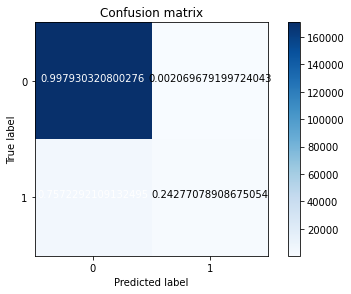

In [31]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, predictions)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

For Kaggle Submission

In [0]:
# Predict on test dataset for kaggle submission
X_fortest.fillna(X_fortest.mean(), inplace = True)
X_fortest_numpy = X_fortest.values
predictions = classifier.predict(X_fortest_numpy)

In [33]:
print(predictions)

[0 0 0 ... 0 0 0]


In [34]:
# Create a DataFrame with the transaction ids and our prediction
submission = pd.DataFrame({'TransactionID':test_df['TransactionID'],'isFraud':predictions})

# Visualize the first 5 rows
submission.head()

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0


In [35]:

# Convert DataFrame to a csv file that can be uploaded
filename = 'Fraud Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Fraud Predictions 1.csv
